<a href="https://colab.research.google.com/github/ShreyasNaphad/Cricket-Score-Prediction/blob/main/Cricket_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk

Imported Libraries

In [ ]:
print(sk.__version__)

1.0.2


In [ ]:
df=pd.read_csv('Cricket Dataset.csv')

In [ ]:
df

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


Check Null Values

In [ ]:
df.isnull().sum()

Unnamed: 0             0
match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
player_dismissed       0
city                8548
venue                  0
dtype: int64

In [ ]:
df[df['city'].isnull()]['venue'][0].split(' ')[0]

'Melbourne'

In [ ]:
cities = np.where(df['city'].isnull(), df['venue'].str.split().apply(lambda x : x[0]), df['city'])
df['city'] = cities

In [ ]:
eligible_cities = df['city'].value_counts()[df['city'].value_counts() >= 360].index.tolist()
df = df[df['city'].isin(eligible_cities)]
df

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


In [ ]:
df['current_score'] = df.groupby('match_id').cumsum()['runs']
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3
...,...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium,125
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium,127


In [ ]:
df['over'] = df['ball'].apply(lambda x : str(x).split(".")[0])
df['ball_no'] = df['ball'].apply(lambda x : str(x).split(".")[1])
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125,19,3
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125,19,4
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium,125,19,5
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium,127,19,6


In [ ]:
df['balls_bowled'] = (df['over'].astype('int')*6 + df['ball_no'].astype('int'))
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125,19,3,117
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125,19,4,118
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium,125,19,5,119
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium,127,19,6,120


In [ ]:
df['pp'] = np.where(df['ball']<= 6.0 , 1, 0)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,pp
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,1
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,1
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,1
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,1
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,1


In [ ]:
df['balls_left'] = 120 - df['balls_bowled']
df['balls_left'] = df['balls_left'].apply(lambda x: 0 if x < 0 else x)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,pp,balls_left
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,1,119
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,1,118
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,1,117
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,1,116
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,1,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125,19,3,117,0,3
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125,19,4,118,0,2
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium,125,19,5,119,0,1
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium,127,19,6,120,0,0


In [ ]:
df['player_dismissed'].apply(lambda x: 1 if x != '0' else '0')

0        0
1        0
2        0
3        0
4        0
        ..
63883    0
63884    0
63885    1
63886    0
63887    0
Name: player_dismissed, Length: 56686, dtype: object

In [ ]:
df['player_dismissed'] = df['player_dismissed'].apply(lambda x: 1 if x != '0' else 0)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,pp,balls_left
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,1,119
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,1,118
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,1,117
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,1,116
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,1,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125,19,3,117,0,3
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125,19,4,118,0,2
63885,123,964,Sri Lanka,Australia,19.5,0,1,Colombo,R Premadasa Stadium,125,19,5,119,0,1
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium,127,19,6,120,0,0


In [ ]:
df['player_dismissed'] = df['player_dismissed'].astype('int')
df['player_dismissed'] = df.groupby('match_id').cumsum()['player_dismissed']
df['wickets_left'] = 10 - df['player_dismissed']
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,pp,balls_left,wickets_left
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,1,119,10
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,1,118,10
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,1,117,10
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,1,116,10
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,1,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,8,Colombo,R Premadasa Stadium,125,19,3,117,0,3,2
63884,122,964,Sri Lanka,Australia,19.4,0,8,Colombo,R Premadasa Stadium,125,19,4,118,0,2,2
63885,123,964,Sri Lanka,Australia,19.5,0,9,Colombo,R Premadasa Stadium,125,19,5,119,0,1,1
63886,124,964,Sri Lanka,Australia,19.6,2,9,Colombo,R Premadasa Stadium,127,19,6,120,0,0,1


In [ ]:
df['crr'] = (df['current_score']*6) / df['balls_bowled']
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,pp,balls_left,wickets_left,crr
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,1,119,10,0.000000
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,1,118,10,0.000000
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,1,117,10,2.000000
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,1,116,10,4.500000
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,1,115,10,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,8,Colombo,R Premadasa Stadium,125,19,3,117,0,3,2,6.410256
63884,122,964,Sri Lanka,Australia,19.4,0,8,Colombo,R Premadasa Stadium,125,19,4,118,0,2,2,6.355932
63885,123,964,Sri Lanka,Australia,19.5,0,9,Colombo,R Premadasa Stadium,125,19,5,119,0,1,1,6.302521
63886,124,964,Sri Lanka,Australia,19.6,2,9,Colombo,R Premadasa Stadium,127,19,6,120,0,0,1,6.350000


In [ ]:
#df['Main_Batsmen'] = np.where(df['wickets_left']< 5 , 0, 1)
df

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,pp,balls_left,wickets_left,crr
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,1,119,10,0.000000
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,1,118,10,0.000000
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,1,117,10,2.000000
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,1,116,10,4.500000
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,1,115,10,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,8,Colombo,R Premadasa Stadium,125,19,3,117,0,3,2,6.410256
63884,122,964,Sri Lanka,Australia,19.4,0,8,Colombo,R Premadasa Stadium,125,19,4,118,0,2,2,6.355932
63885,123,964,Sri Lanka,Australia,19.5,0,9,Colombo,R Premadasa Stadium,125,19,5,119,0,1,1,6.302521
63886,124,964,Sri Lanka,Australia,19.6,2,9,Colombo,R Premadasa Stadium,127,19,6,120,0,0,1,6.350000


In [ ]:
groups = df.groupby('match_id')

match_ids = df['match_id'].unique()
last_five = []
for id in match_ids:
    last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs'].values.tolist())
df['last_five'] = last_five
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,pp,balls_left,wickets_left,crr,last_five
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,1,119,10,0.000000,NaN
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,1,118,10,0.000000,NaN
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,1,117,10,2.000000,NaN
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,1,116,10,4.500000,NaN
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,1,115,10,3.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,8,Colombo,R Premadasa Stadium,125,19,3,117,0,3,2,6.410256,32.0
63884,122,964,Sri Lanka,Australia,19.4,0,8,Colombo,R Premadasa Stadium,125,19,4,118,0,2,2,6.355932,32.0
63885,123,964,Sri Lanka,Australia,19.5,0,9,Colombo,R Premadasa Stadium,125,19,5,119,0,1,1,6.302521,32.0
63886,124,964,Sri Lanka,Australia,19.6,2,9,Colombo,R Premadasa Stadium,127,19,6,120,0,0,1,6.350000,33.0


In [ ]:
df[df['ball']<=19.6]
#df[df['ball']>=5.0]


,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,pp,balls_left,wickets_left,crr,last_five
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,1,119,10,0.000000,NaN
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,1,118,10,0.000000,NaN
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,1,117,10,2.000000,NaN
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,1,116,10,4.500000,NaN
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,1,115,10,3.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,120,964,Sri Lanka,Australia,19.2,0,8,Colombo,R Premadasa Stadium,124,19,2,116,0,4,2,6.413793,35.0
63883,121,964,Sri Lanka,Australia,19.3,1,8,Colombo,R Premadasa Stadium,125,19,3,117,0,3,2,6.410256,32.0
63884,122,964,Sri Lanka,Australia,19.4,0,8,Colombo,R Premadasa Stadium,125,19,4,118,0,2,2,6.355932,32.0
63885,123,964,Sri Lanka,Australia,19.5,0,9,Colombo,R Premadasa Stadium,125,19,5,119,0,1,1,6.302521,32.0


In [ ]:
df['Death_Overs'] = np.where(df['ball']>15 , 1, 0)
df['Middle_Order'] = np.where((df['wickets_left']>=7 ) & (df['wickets_left']<=8),1,0) 
df['Pressure'] = np.where(df['crr']<=7 , 1, 0)
df['Top_Order'] = np.where(df['wickets_left']>=9, 1, 0)
df['Lower_Order'] = np.where((df['wickets_left']<=6) & (df['wickets_left']>=5), 1, 0)
df['Aggression_Mode'] = np.where(df['last_five']>=45, 1, 0)
df['Tail'] = np.where(df['wickets_left']<=4, 1, 0)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,...,wickets_left,crr,last_five,Death_Overs,Middle_Order,Pressure,Top_Order,Lower_Order,Aggression_Mode,Tail
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,...,10,0.000000,NaN,0,0,1,1,0,0,0
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,...,10,0.000000,NaN,0,0,1,1,0,0,0
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,...,10,2.000000,NaN,0,0,1,1,0,0,0
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,...,10,4.500000,NaN,0,0,1,1,0,0,0
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,...,10,3.600000,NaN,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,8,Colombo,R Premadasa Stadium,125,...,2,6.410256,32.0,1,0,1,0,0,0,1
63884,122,964,Sri Lanka,Australia,19.4,0,8,Colombo,R Premadasa Stadium,125,...,2,6.355932,32.0,1,0,1,0,0,0,1
63885,123,964,Sri Lanka,Australia,19.5,0,9,Colombo,R Premadasa Stadium,125,...,1,6.302521,32.0,1,0,1,0,0,0,1
63886,124,964,Sri Lanka,Australia,19.6,2,9,Colombo,R Premadasa Stadium,127,...,1,6.350000,33.0,1,0,1,0,0,0,1


In [ ]:
final_df = df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')
final_df

,match_id,runs_x,Unnamed: 0,batting_team,bowling_team,ball,runs_y,player_dismissed,city,venue,...,wickets_left,crr,last_five,Death_Overs,Middle_Order,Pressure,Top_Order,Lower_Order,Aggression_Mode,Tail
0,2,168,0,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,...,10,0.000000,NaN,0,0,1,1,0,0,0
1,2,168,1,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,...,10,0.000000,NaN,0,0,1,1,0,0,0
2,2,168,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,...,10,2.000000,NaN,0,0,1,1,0,0,0
3,2,168,3,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,...,10,4.500000,NaN,0,0,1,1,0,0,0
4,2,168,4,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,...,10,3.600000,NaN,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56681,964,128,121,Sri Lanka,Australia,19.3,1,8,Colombo,R Premadasa Stadium,...,2,6.410256,32.0,1,0,1,0,0,0,1
56682,964,128,122,Sri Lanka,Australia,19.4,0,8,Colombo,R Premadasa Stadium,...,2,6.355932,32.0,1,0,1,0,0,0,1
56683,964,128,123,Sri Lanka,Australia,19.5,0,9,Colombo,R Premadasa Stadium,...,1,6.302521,32.0,1,0,1,0,0,0,1
56684,964,128,124,Sri Lanka,Australia,19.6,2,9,Colombo,R Premadasa Stadium,...,1,6.350000,33.0,1,0,1,0,0,0,1


In [ ]:
final_df=final_df[['batting_team','bowling_team','city','current_score', 'pp', 'balls_left','wickets_left','crr', 'Top_Order', 'Middle_Order', 'Lower_Order', 'Tail', 'Pressure', 'Aggression_Mode','last_five','Death_Overs','runs_x']]
final_df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
final_df = final_df.sample(final_df.shape[0])
final_df

,batting_team,bowling_team,city,current_score,pp,balls_left,wickets_left,crr,Top_Order,Middle_Order,Lower_Order,Tail,Pressure,Aggression_Mode,last_five,Death_Overs,runs_x
55564,India,Sri Lanka,Pune,53,0,62,4,5.482759,0,0,0,1,1,0,21.0,0,101
39591,West Indies,New Zealand,Lauderhill,198,0,5,8,10.330435,0,1,0,0,0,1,71.0,1,209
10486,Pakistan,Australia,Dubai,51,0,81,9,7.846154,1,0,0,0,0,0,38.0,0,147
45667,South Africa,New Zealand,Chittagong,39,1,85,8,6.685714,0,1,0,0,1,0,37.0,0,170
8451,Pakistan,South Africa,Centurion,147,0,6,1,7.736842,0,0,0,1,0,0,31.0,1,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28392,South Africa,Afghanistan,Barbados,96,0,30,5,6.400000,0,0,1,0,1,0,23.0,0,139
5522,Sri Lanka,Pakistan,Abu Dhabi,43,0,81,10,6.615385,1,0,0,0,1,0,38.0,0,124
3891,Afghanistan,West Indies,St Kitts,60,0,62,7,6.206897,0,1,0,0,1,0,15.0,0,146
10170,New Zealand,India,Hamilton,171,0,23,7,10.577320,0,1,0,0,0,1,58.0,1,212


In [ ]:
X = final_df.drop(columns=['runs_x'])
y = final_df['runs_x']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
X_train

,batting_team,bowling_team,city,current_score,pp,balls_left,wickets_left,crr,Top_Order,Middle_Order,Lower_Order,Tail,Pressure,Aggression_Mode,last_five,Death_Overs
4178,New Zealand,West Indies,Mount Maunganui,74,0,77,10,10.325581,1,0,0,0,0,1,50.0,0
14141,West Indies,India,Lauderhill,54,0,47,5,4.438356,0,0,1,0,1,0,20.0,0
11479,Sri Lanka,Australia,Brisbane,40,0,79,8,5.853659,0,1,0,0,1,0,34.0,0
15740,Sri Lanka,Pakistan,Lahore,116,0,39,8,8.592593,0,1,0,0,0,0,43.0,0
29639,Pakistan,South Africa,St Lucia,111,0,28,6,7.239130,0,0,1,0,0,1,55.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30503,Bangladesh,New Zealand,Hamilton,64,0,35,3,4.517647,0,0,0,1,1,0,17.0,0
54434,South Africa,West Indies,Nagpur,42,0,80,7,6.300000,0,1,0,0,1,0,29.0,0
27441,New Zealand,Sri Lanka,Colombo,162,0,7,7,8.601770,0,1,0,0,0,1,45.0,1
29350,West Indies,India,Barbados,53,0,69,10,6.235294,1,0,0,0,1,0,33.0,0


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=2000,learning_rate=0.2,max_depth=12,random_state=1))
])

In [ ]:
pipe.fit(X_train,y_train)

[13:58:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', StandardScaler()),
                ('step3',
                 XGBRegressor(learning_rate=0.2, max_depth=12,
                              n_estimators=2000, random_state=1))])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
#X_train_prediction = pipe.predict(X_train)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


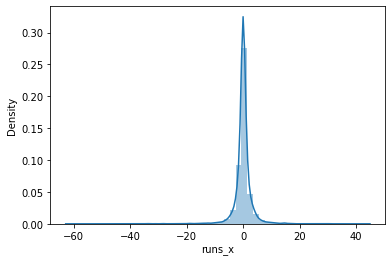

In [ ]:
import seaborn as sns
sns.distplot(y_test-y_pred)

In [ ]:
print(r2_score(y_test,y_pred)) 
#print(r2_score(X_train, y_train))
print(mean_absolute_error(y_test,y_pred))

0.9889315328217633
1.6299097234070736


In [ ]:
X_train = pipe.predict(X_train)
print(r2_score(X_train, y_train))

0.9999001641623957


In [ ]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))
pipe_loaded = pickle.load(open('pipe.pkl', "rb"))

[14:05:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
eligible_cities

['Colombo',
 'Mirpur',
 'Johannesburg',
 'Dubai',
 'Auckland',
 'Cape Town',
 'London',
 'Pallekele',
 'Barbados',
 'Sydney',
 'Melbourne',
 'Durban',
 'St Lucia',
 'Wellington',
 'Lauderhill',
 'Hamilton',
 'Centurion',
 'Manchester',
 'Abu Dhabi',
 'Mumbai',
 'Nottingham',
 'Southampton',
 'Mount Maunganui',
 'Chittagong',
 'Kolkata',
 'Lahore',
 'Delhi',
 'Nagpur',
 'Chandigarh',
 'Adelaide',
 'Bangalore',
 'St Kitts',
 'Cardiff',
 'Christchurch',
 'Trinidad',
 'Brisbane',
 'Birmingham',
 'Hambantota',
 'Dhaka',
 'Lucknow',
 'Karachi',
 'Napier',
 'Hobart',
 'Rajkot',
 'Perth',
 'Harare',
 'Chester-le-Street',
 'Bristol',
 'Pune']

In [ ]:
score = pipe.score(X_test,y_test)*100
print("R-squared value:" , score)

R-squared value: 98.89315328217633


In [ ]:
final_df.columns

Index(['batting_team', 'bowling_team', 'city', 'current_score', 'pp',
       'balls_left', 'wickets_left', 'crr', 'Top_Order', 'Middle_Order',
       'Lower_Order', 'Tail', 'Pressure', 'Aggression_Mode', 'last_five',
       'Death_Overs', 'runs_x'],
      dtype='object')